In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [178]:
from torchdyn.datasets import generate_gaussians, generate_moons, generate_spirals

def sample_normal(n, mu=torch.zeros(2), sigma=1):
    distr = torch.distributions.MultivariateNormal(mu, sigma*torch.eye(2))
    return distr.sample((n,))

def sample_gaussians(n):
    x0, _ = generate_gaussians(n, n_gaussians=8, radius=2)
    return x0

def sample_moons(n):
    x0, _ = generate_moons(n, noise=0)
    return x0 * 3 - 1

def sample_circles(n):
    x0, _ = generate_spirals(n)
    return x0

class sampler():
    def __init__(self, dataset: str):
        if dataset == "normal":
            self.sampler = sample_normal
        elif dataset == "gaussians":
            self.sampler = sample_gaussians
        elif dataset == "moons":
            self.sampler = sample_moons
        elif dataset == "spirals":
            self.sampler = sample_circles
        else:
            raise Exception("Selected Dataset not supported. Choose between normal, gaussians, moons or spirals")

    
    def __call__(self, n: int):
        return self.sampler(n)

In [183]:
a = sampler("moons")(20)

print(type(a[0,0]))
print(a[0,0])

<class 'torch.Tensor'>
tensor(2.)


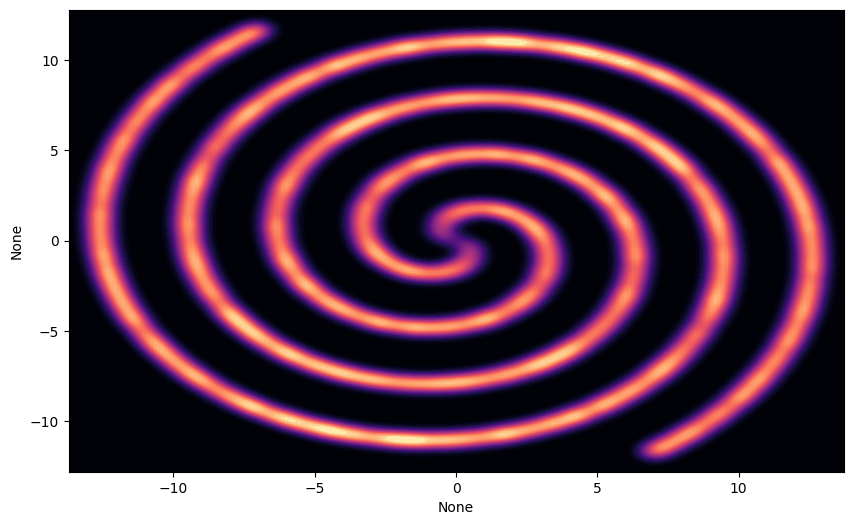

In [187]:
def toy_density(dataset: str):
    samples = sampler(dataset)(20000)
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    sns.kdeplot(x=samples[:,0], y=samples[:,1], fill=True, thresh=0, levels=100, cmap="magma", ax=ax, bw_adjust=.3)

    plt.show()

toy_density('spirals')

torch.Size([400, 2])


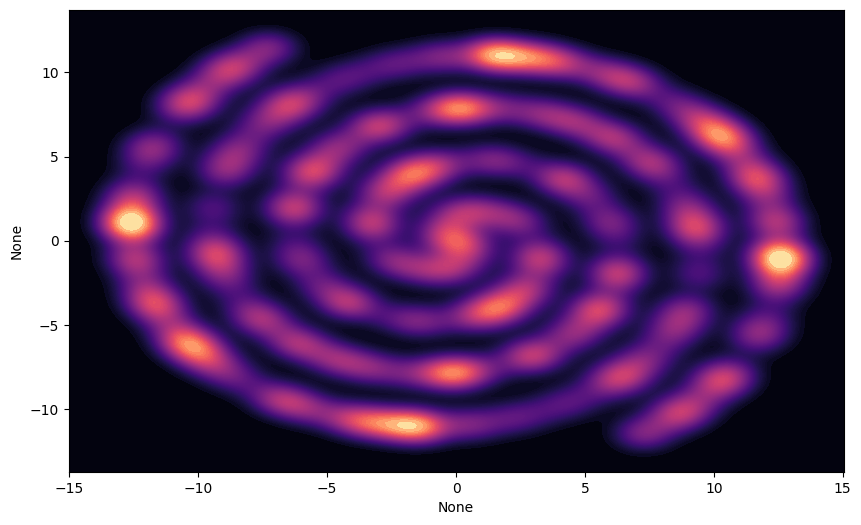

In [185]:
toy_density('spirals')